# Aviation Accident Risk Analysis

## Introduction  
Our company is expanding into the Aviation Industry and aims to purchase and operate aircraft for commercial and private enterprises. However, the aviation industry presents significant safety risks, and the company's goal in identifying low-risk aircraft models.

To minimize risk and maximize safety, we must determine which aircraft types have the lowest accident rates and severity levels. This analysis will provide insights into accident trends, key risk factors, and aircraft safety records.


## Data Understanding

#### Data Source and why it is suitable for the project.
  
The data is from the National Transportation Safety Board(NTSB) and has aviation data from the year 1962 to 2023. This data is suitable for the project since it provides detailed history of aviation accidents as well as their causes. It will allow the business make data-driven decisons when selecting the suitable aircraft for purchase.

#### Descriptive statistics of the data

Descrptive analysis of the data will be performed using **.describe()** method to summarize key statistics. This will help reveal things such as the mean number of injuries per accidents as well as the variance to show the severity differences among aircraft models, makes and categories.

#### Justification of the inclusion of features based on their properties and relevance for the project
  
The features Aircraft model, aircraft make and category are important for identifying low-risk aircraft. 

*1. Aircraft model: Helps determine historically safer aircraft models by showing specific types of aircraft with their recorded injuries.*

*2. Aircraft category: Helps determine categories that are more prone to accidents by classifying aircrafts based on their use(eg. commercial, personal).*

*3. Aircraft make: Helps the business to assess brands that produce more reliable aircraft.*

#### Limitations of the data that have implications for the project

1. The dataset does not include external influences like pilot experience or maintenance records, which also affect aviation safety.
2. Potential data gaps such as missing values in some fields.


# Data Preparation

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Loading States code data into a pandas dataframe & exploring the top 5 rows.**

  ***.head()*** helps get the first 5 rows

In [85]:
states_df = pd.read_csv("USState_Codes.csv")
states_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


**Loading *aviation data* and exploring the top 5 rows.**
  
Using *encoding="ISO-8859-1"* since the data has special characters that may not be readable using the default UTF-8 encoding, and *low_memory=False* since some of the columns have mixed data types.

In [86]:
aviation_df = pd.read_csv("AviationData.csv", encoding="ISO-8859-1", low_memory=False)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


**Getting the summary of the DataFrame to understand it's structure using .info()**

In [87]:
aviation_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [88]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**Checking for the statistical information in the data**

In [89]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


**Checking for duplicates in the data**

In [90]:
aviation_df.duplicated().value_counts()

False    88889
Name: count, dtype: int64

**Checking for null values**

In [91]:
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

**Dropping some of the columns**

In [92]:
aviation_df.dropna(subset=['Latitude','Longitude','Air.carrier','Schedule'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
22096,20001213X27446,Accident,LAX89LA068,1988-12-23,"Midway Islands, PO",United States,38.54,-173.24,NONE,NaN,...,Unknown,United Airlines,NaN,1.0,1.0,220.0,UNK,Cruise,Probable Cause,02-02-2016
45404,20001211X11573,Accident,LAX99FA051,1998-12-17,"LOS ANGELES, CA",United States,33.948611,-118.413611,LAX,Los Angeles International,...,Unknown,Clay Lacy (dba: Clay Lacy Aviation),0.0,0.0,0.0,7.0,VMC,Cruise,Probable Cause,25-11-2003
45592,20001205X00119,Incident,ANC99IA027,1999-02-05,"FAIRBANKS, AK",United States,64.8,-147.866111,FAI,Fairbanks International,...,NaN,"Alaska Air Group, Inc (dba: Alaska Airlines)",0.0,0.0,0.0,138.0,IMC,Takeoff,Probable Cause,01-07-2002
46293,20001212X19017,Accident,LAX99FA218A,1999-06-06,"LOS ANGELES, CA",United States,33.938611,-118.408889,LAX,Los Angeles International,...,Unknown,"Philippine Airlines, Inc.",NaN,NaN,NaN,699.0,VMC,Taxi,Probable Cause,25-11-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88816,20221128106371,Accident,CEN23LA052,2022-11-22,"Denton, TX",United States,292548N,1005924W,NaN,NaN,...,Personal,Pilot,0.0,0.0,0.0,7.0,NaN,NaN,NaN,27-12-2022
88822,20221125106361,Accident,CEN23FA045,2022-11-25,"Mount Comfort, IN",United States,394934N,0855524W,MQJ,INDIANAPOLIS RGNL,...,Positioning,Verijet,0.0,0.0,0.0,1.0,IMC,NaN,NaN,09-12-2022
88837,20221209106436,Accident,ERA23LA081,2022-12-01,"Guantanamo Bay, OF",Cuba,195422N,0751159W,MUGM,GUANTANAMO BAY NAVAL AIR STATI,...,Positioning,"REVA, Inc.",0.0,0.0,0.0,4.0,VMC,NaN,NaN,20-12-2022
88840,20221205106415,Accident,CEN23LA058,2022-12-03,"Regent, ND",United States,462541N,1023140W,NaN,NaN,...,Personal,WISSMAN JOHN C,0.0,3.0,0.0,0.0,NaN,NaN,NaN,06-12-2022


**Filling null values using .fillna(), to fill the null numeric columns with 0**

In [93]:
aviation_df['Total.Fatal.Injuries'] = aviation_df['Total.Fatal.Injuries'].fillna(0)

In [94]:
aviation_df['Total.Serious.Injuries'] = aviation_df['Total.Serious.Injuries'].fillna(0)

In [95]:
aviation_df['Total.Minor.Injuries'] = aviation_df['Total.Minor.Injuries'].fillna(0)

**Creating a column Total.injuries to get the total number of injuries row-wise**

In [96]:
aviation_df['Total.Injuries'] = aviation_df[
    ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
].sum(axis=1)

In [97]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0


**Getting statistical information on the column Total.Injuries**

In [98]:
aviation_df['Total.Injuries'].describe()

count    88889.000000
mean         1.114379
std          6.027319
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        380.000000
Name: Total.Injuries, dtype: float64

Converting the *Make* column to titlecase since some makes (eg. Cessna, CESSNA) are in lower case and others in uppercase, causing inconsistency

In [99]:
aviation_df['Make'] = aviation_df['Make'].str.title()

Converting the 'Event.Date' column to a DateTime format

In [100]:
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'])

# Data Analysis

Looking at the trend of number of injuries per year

In [101]:
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,1979


In [102]:
annual_injuries = aviation_df.groupby('Year')['Total.Injuries'].sum().reset_index()
annual_injuries

,Year,Total.Injuries
0,1948,2.0
1,1962,4.0
2,1974,3.0
3,1977,2.0
4,1979,4.0
5,1981,4.0
6,1982,3310.0
7,1983,2994.0
8,1984,2973.0
9,1985,3368.0


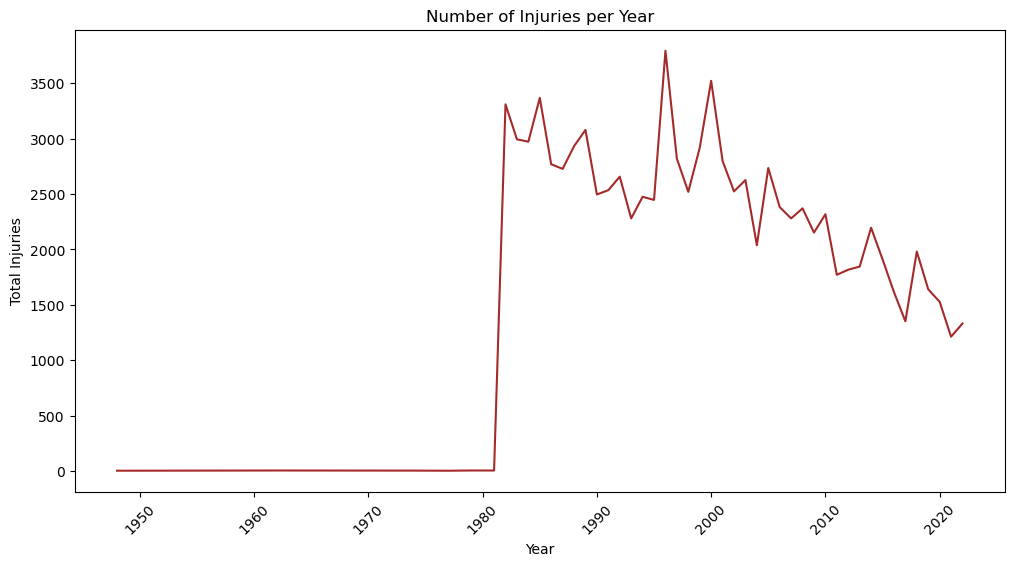

In [103]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.lineplot(x=annual_injuries['Year'], y=annual_injuries['Total.Injuries'], color='brown')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Number of Injuries per Year')
plt.savefig("injury_trends_overtime.png", dpi=300, bbox_inches='tight')
plt.show()

From the figure above, it is evident that there were few injuries upto the year 1981, where we see a rise in injuries in 1982. There was a gradual drop until 1996 were there is a spike with 3794 injuries. There after, we see a decrease in the number of injuries which can be attributed to measures put in place to curb accidents.

**Grouping data to better understand accident severity and aircrafts that are more reliable**

In [104]:
injuries_by_model_and_make = aviation_df.groupby(['Aircraft.Category','Make','Model'])['Total.Injuries'].sum().nlargest(20).reset_index()
injuries_by_model_and_make

,Aircraft.Category,Make,Model,Total.Injuries
0,Airplane,Boeing,737,1763.0
1,Airplane,Cessna,172,555.0
2,Airplane,Boeing,777 - 206,534.0
3,Airplane,Airbus,A321,383.0
4,Airplane,Boeing,747-2B6B,380.0
5,Airplane,Airbus,A330,374.0
6,Airplane,Cessna,182,320.0
7,Helicopter,Robinson,R44,310.0
8,Airplane,Airbus,A320,306.0
9,Airplane,Boeing,767,259.0


### Category deepdive

In this section, we will explore the categories and try to understand at the category level, which ones are safer and which ones are not.

In [105]:
injuries_by_category = aviation_df.groupby('Aircraft.Category')['Total.Injuries'].sum().sort_values().reset_index()
injuries_by_category

,Aircraft.Category,Total.Injuries
0,UNK,0.0
1,Powered-Lift,1.0
2,ULTR,1.0
3,Rocket,2.0
4,Blimp,3.0
5,WSFT,13.0
6,Unknown,24.0
7,Ultralight,29.0
8,Powered Parachute,128.0
9,Gyrocraft,129.0


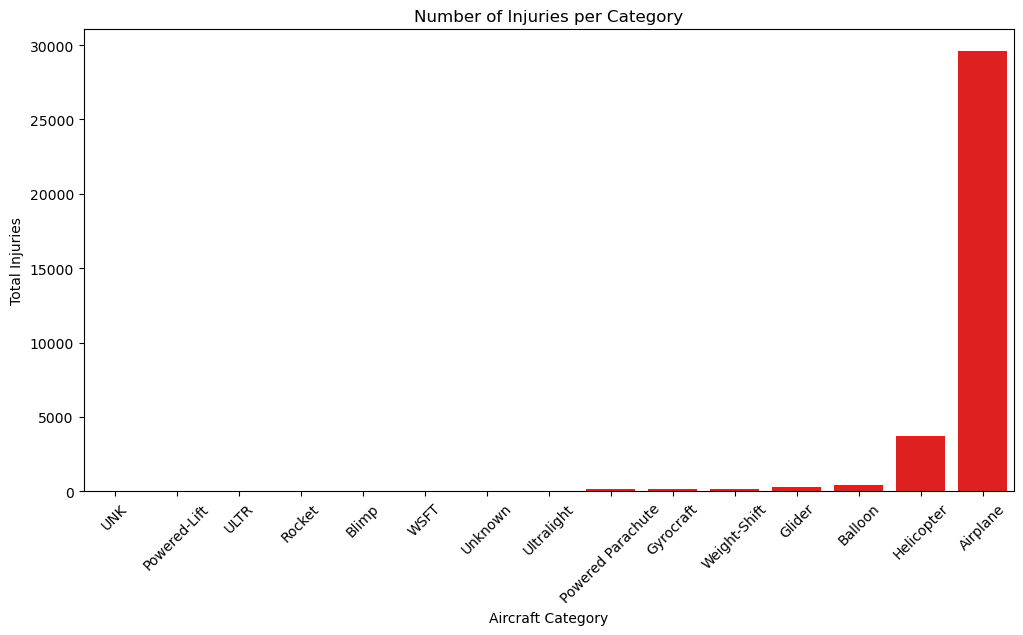

In [106]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(x=injuries_by_category['Aircraft.Category'], y=injuries_by_category['Total.Injuries'], color='red')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Injuries')
plt.title('Number of Injuries per Category')
plt.savefig("injury_per_category.png", dpi=300, bbox_inches='tight')
plt.show()

From the above, we see that **Airplane and Helicopter** are leading interms of total number of Injuries. Prompting us to look further into these 2 categories

### Make deepdive

In this section, we will explore more the different makes in the categories that we have seen have the largest number of injuries, which are **Airplane and Helicopter** 
We will filter our dataset to only keep those 2 categories

In [107]:
# Filter dataframe for only the relevant categories
filtered_df = aviation_df[aviation_df['Aircraft.Category'].isin(['Airplane','Helicopter'])]
filtered_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries,Year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1.0,1979
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.0,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0.0,1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1.0,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1.0,1982


In [108]:
injuries_airplane_and_helicopter = filtered_df.groupby(['Aircraft.Category', 'Make'])['Total.Injuries'].sum().nlargest(20).reset_index()
injuries_airplane_and_helicopter

,Aircraft.Category,Make,Total.Injuries
0,Airplane,Cessna,6383.0
1,Airplane,Boeing,5445.0
2,Airplane,Piper,3686.0
3,Airplane,Beech,1894.0
4,Airplane,Airbus,1568.0
5,Helicopter,Bell,1124.0
6,Helicopter,Robinson,574.0
7,Airplane,Embraer,501.0
8,Airplane,Mcdonnell Douglas,459.0
9,Airplane,Airbus Industrie,417.0


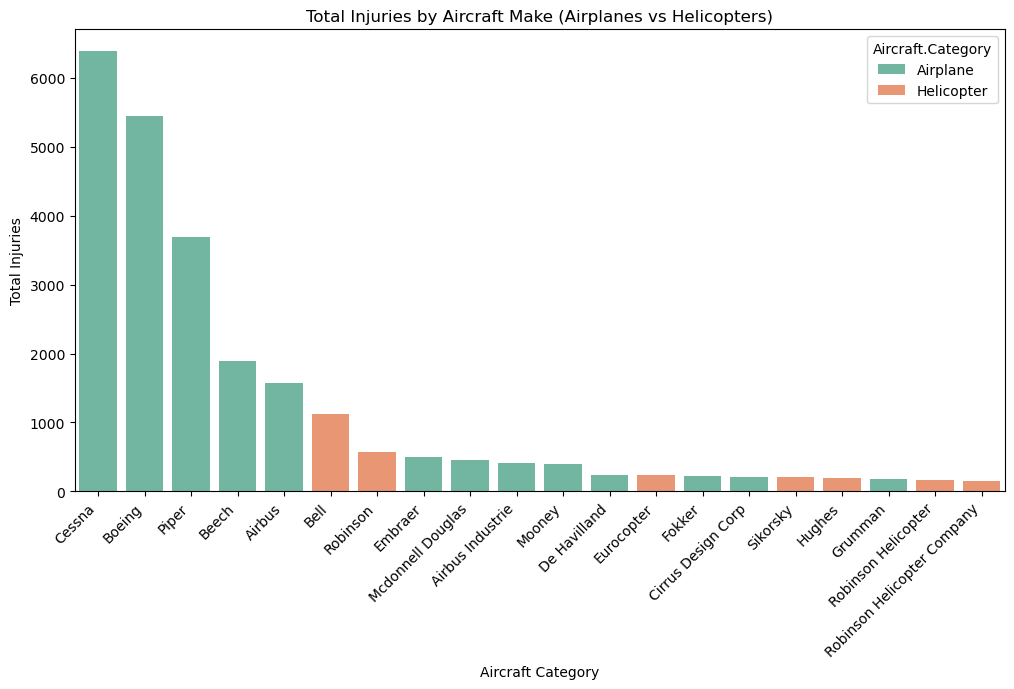

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(data=injuries_airplane_and_helicopter ,x='Make', y='Total.Injuries', hue='Aircraft.Category', palette='Set2')
plt.xticks(rotation=45, ha="right") 
plt.xlabel('Aircraft Category')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Aircraft Make (Airplanes vs Helicopters)')
plt.savefig("injury_per_make.png", dpi=300, bbox_inches='tight')
plt.show()

From the visualization above, in the airplane category, Cessna, Boeing and Piper have a high number of total injuries. In the Helicopter category, Bell has the highest number of injuries.

#### Model deepdive

In [110]:
make_model = filtered_df.groupby(['Make', 'Model'])['Total.Injuries'].sum().nlargest(20).reset_index()
make_model

,Make,Model,Total.Injuries
0,Boeing,737,1763.0
1,Cessna,172,555.0
2,Boeing,777 - 206,534.0
3,Airbus,A321,383.0
4,Boeing,747-2B6B,380.0
5,Airbus,A330,374.0
6,Cessna,182,320.0
7,Robinson,R44,310.0
8,Airbus,A320,306.0
9,Boeing,767,259.0


In [111]:
filtered_df["Make-Model"] = filtered_df["Make"] + "-" + filtered_df["Model"]

In [112]:
make_with_model = filtered_df.groupby(['Make-Model'])['Total.Injuries'].sum().nlargest(20).reset_index()
make_with_model

,Make-Model,Total.Injuries
0,Boeing-737,1763.0
1,Cessna-172,555.0
2,Boeing-777 - 206,534.0
3,Airbus-A321,383.0
4,Boeing-747-2B6B,380.0
5,Airbus-A330,374.0
6,Cessna-182,320.0
7,Robinson-R44,310.0
8,Airbus-A320,306.0
9,Boeing-767,259.0


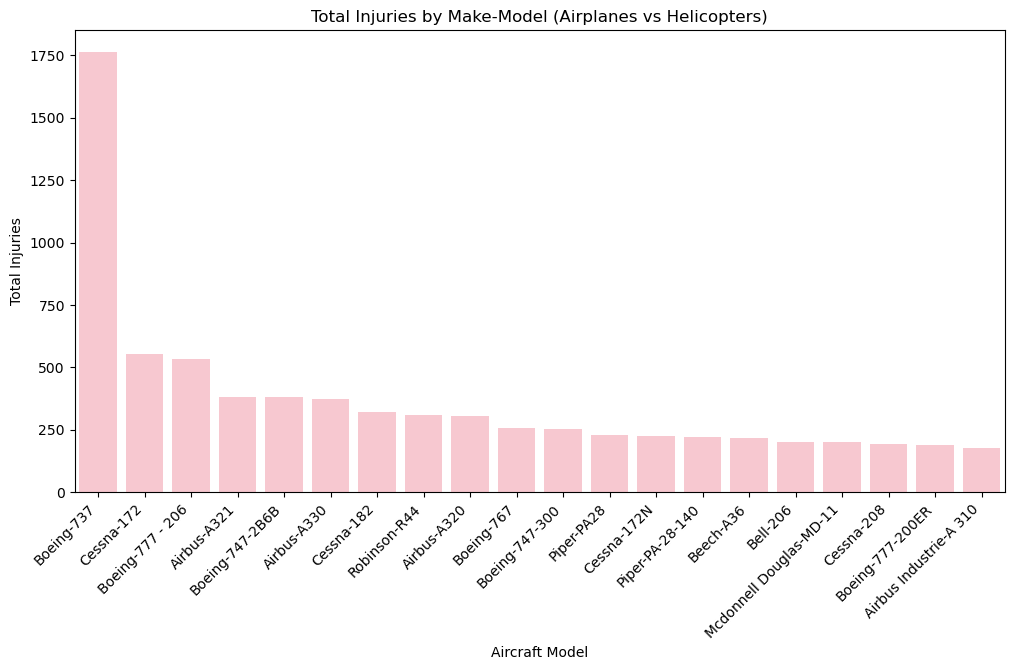

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(data=make_with_model ,x='Make-Model', y='Total.Injuries', color='pink')
plt.xticks(rotation=45, ha="right") 
plt.xlabel('Aircraft Model')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Make-Model (Airplanes vs Helicopters)')
plt.savefig("injuries_by_make_model.png", dpi=300, bbox_inches='tight')
plt.show()

From the figure above, Boeing 732 has the highest number of injuries, followed by Cessna172. Cessna 208, Boeing 777-200ER and Airbus Industrie-a 310 have the lowest number of injuries

#### **Findings and Recommendations for the Business**  

##### **Finding 1: Cessna 172 Boeing 737 Have Significantly Higher Injury Counts**  
Based on a breakdown of overall injuries by aircraft model, the Cessna 172 and Boeing 737 have among of the highest injury rates.  Nonetheless, there have been no documented injuries in models such as the G-V, G109, and G1159B, which have a good safety record. 

From Figure 1 above, we see that Cessna 
**Recommendation:** The company should prioritize acquiring aircraft models with low or zero historical injury records, as these indicate lower risk levels. More research into the safety features and operational environments of these models is important before purchase.  

##### **Finding 2: Aircraft Category Plays a Major Role in Safety**  
According to the Total Injuries by Aircraft Category research, powered-lift aircraft, gliders, and balloons have substantially less injuries than airplanes and helicopters.
The high number of injuries in airplanes is likely due to their widespread commercial use rather than inherent design risks.

**Recommendation**: Investing in smaller aircraft types like powered-lift, ultralights, or gliders may lower risk if the organization places a higher priority on safety than operational scale. Selecting models with improved safety records, cutting-edge safety measures, and reduced accident rates is essential if large commercial aircraft are needed.

##### **Finding 3: Aircraft Make Influences Safety Performance**  
According to the Total Injuries by Aircraft Make analysis, the most injuries have been reported by Cessna, Piper, and Boeing. This does not necessarily imply that certain brands are dangerous, though; it can be because of their larger fleet and more utilization.
Manufacturers like Mulholland, Curtiss-Wright, and MKII Corporation, on the other hand, had no documented injuries, indicating excellent safety performance or little exposure to operating risks.

**Recommendation**:
The company should focus on aircraft manufacturers with strong safety records and lower historical injury counts. Conducting further research on accident rates per flight hour will provide deeper insights before making purchasing decisions.


#### **Conclusion:**  
In conclusion, this study offers important insights into aviation safety by utilizing data analysis and visualization approaches. The company's aircraft buying strategy will be directly informed by the findings, guaranteeing a sustainable and low-risk entry into the aviation industry. The business can reduce operational costs by concentrating on safer aircraft categories, picking manufacturers with a solid safety record, and selecting aircraft models with low injury counts.